# FUNGI

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline

### ALPHA & BETA DIVERSITY
1. make a MAFFT tree
2. alpha rarefaction
3. alpha diversity
4. beta diversity

In [2]:
#import packages
import os
import dokdo
import qiime2 as q2
import pandas as pd
import seaborn as sns
import plotnine as p9
import matplotlib.pyplot as plt
from qiime2.plugins import phylogeny
from qiime2.plugins import diversity
from skbio import DistanceMatrix
import qiime2.plugins.phylogeny.actions as phylogeny_actions

In [3]:
# import data
denoisetable_fun = q2.Artifact.load('./results/denoisetable_fun.qza')
rep_seqs_fun = q2.Artifact.load('./results/rep_seqs_fun.qza')
denoising_stats = q2.Artifact.load('./results/denoising_stats.qza')
sample_metadata = q2.Metadata.load('../00.sample-metadata.tsv')

In [4]:
from qiime2.plugins import feature_table

# summarise and visualise
feature_table.visualizers.summarize(
    table = denoisetable_fun,
    sample_metadata = sample_metadata
).visualization

<visualization: Visualization uuid: 16b1c7f0-0dd0-4296-9073-2ea808db9fd5>

### TREE

In [5]:
action_results = phylogeny_actions.align_to_tree_mafft_fasttree(
    sequences=rep_seqs_fun,
)
aligned_rep_seqs = action_results.alignment
masked_aligned_rep_seqs = action_results.masked_alignment
unrooted_tree = action_results.tree
rooted_tree = action_results.rooted_tree

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: mafft --preservecase --inputorder --thread 1 /tmp/qiime2-archive-20scjvw5/c6be4a17-54c9-4833-ab48-710ef30df0c2/data/dna-sequences.fasta



inputfile = orig
118 x 260 - 260 d
nthread = 1
nthreadpair = 1
nthreadtb = 1
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
  101 / 118 (thread    0)
done.

Constructing a UPGMA tree (efffree=0) ... 
  110 / 118
done.

Progressive alignment 1/2... 
STEP    12 / 117 (thread    0)
Reallocating..done. *alloclen = 1521
STEP   117 / 117 (thread    0)
done.

Making a distance matrix from msa.. 
  100 / 118 (thread    0)
done.

Constructing a UPGMA tree (efffree=1) ... 
  110 / 118
done.

Progressive alignment 2/2... 
STEP    22 / 117 (thread    0)
Reallocating..done. *alloclen = 1521
STEP   117 / 117 (thread    0)
done.

disttbfast (nuc) Version 7.505
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
1 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto inpu

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: FastTree -quote -nt /tmp/qiime2-archive-q43ta26c/9c0a26ff-e29c-456e-8067-e83c94a054c1/data/aligned-dna-sequences.fasta



FastTree Version 2.1.10 Double precision (No SSE3)
Alignment: /tmp/qiime2-archive-q43ta26c/9c0a26ff-e29c-456e-8067-e83c94a054c1/data/aligned-dna-sequences.fasta
Nucleotide distances: Jukes-Cantor Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jukes-Cantor, CAT approximation with 20 rate categories
Initial topology in 0.03 seconds
Refining topology: 27 rounds ME-NNIs, 2 rounds ME-SPRs, 14 rounds ML-NNIs
      0.12 seconds: SPR round   1 of   2, 201 of 232 nodes
      0.22 seconds: SPR round   2 of   2, 201 of 232 nodes
Total branch-length 8.254 after 0.25 sec
      0.35 seconds: ML NNI round 1 of 14, 101 of 115 splits, 23 changes (max delta 8.570)
ML-NNI round 1: LogLk = -11498.492 NNIs 28 max delta 8.57 Time 0.37
Switched to using 20 rate categories (CAT approximation)
Rate categories were divided by 1.027 so that average rate = 1.0
CAT-based log-likelihoods may not be compar

### ALPHA AND BETA DIVERSITY

In [6]:
# # choose a round number in the 3rd quartile frequency per sample from the feature table visual summary
# # this step can take some time
# alpha_rarefaction_all = diversity.actions.alpha_rarefaction(
#     table = denoisetable_fun,
#     max_depth = 35000,
#     phylogeny = rooted_tree,
#     metrics = {'observed_features'},
#     metadata = sample_metadata,
#     steps = 1000
# )

In [7]:
# save alpha_rarefacion
# alpha_rarefaction_all.visualization.save('./results/alpha_rarefaction_35000.qzv')
qzv_file_alpha = q2.Visualization.load('./results/alpha_rarefaction_35000.qzv')

In [8]:
# #this step can take some time
# sns.set()
# ax = dokdo.alpha_rarefaction_plot(qzv_file_alpha,
#                                   figsize=(9, 6),
#                                   metric='observed_features')
# 
# ax.set_xlabel('Globina sekvenciranja')
# ax.set_ylabel('Število ASV')
# 
# ax.legend(ncol=5)
# plt.tight_layout()
# plt.savefig('./results/fun_alpha_rarefaction_plot_35k.png')

### ALPHA DIVERSITY

In [9]:
from qiime2.plugins import feature_table

# summarise and visualise
feature_table.visualizers.summarize(
    table = denoisetable_fun,
    sample_metadata = sample_metadata
).visualization

<visualization: Visualization uuid: c560bd4b-b0fd-4b02-82fe-b768812684ce>

In [10]:
# set sampling_depth based on alpha rarefacation curve
depth = 8341
action_results = diversity.actions.core_metrics_phylogenetic(
    table = denoisetable_fun,
    phylogeny = rooted_tree,
    sampling_depth = depth,
    metadata = sample_metadata
)

/home/npajek/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-hz5zh6kk/ab402bca-8069-487c-9456-89619c916d16/data/feature-table.biom -t /tmp/qiime2-archive-2cwhi88m/594e4928-395b-4327-8686-69d96e7195c1/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-2y26jixr

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-hz5zh6kk/ab402bca-8069-487c-9456-89619c916d16/data/feature-table.biom -t /tmp/qiime2-archive-2cwhi88m/594e4928-395b-4327-8686-69d96e7195c1/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-t4ez7xwx

Running external command line application. This may print messages to stdout and/

/home/npajek/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.009125776317008729 and the largest is 0.7773715635591957.


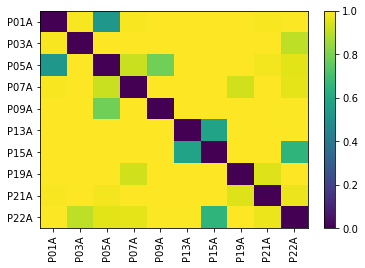

In [11]:
action_results.bray_curtis_distance_matrix.view(view_type=DistanceMatrix)

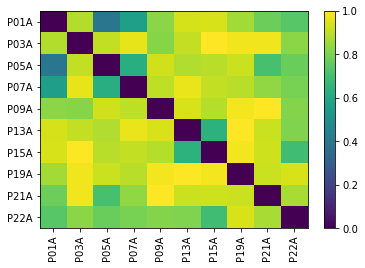

In [12]:
action_results.jaccard_distance_matrix.view(view_type=DistanceMatrix)

In [13]:
action_results.jaccard_emperor

<visualization: Visualization uuid: 35926ce6-2990-47f7-b4bc-9885d77853da>

In [14]:
# alpha_rarefaction = diversity.visualizers.alpha_rarefaction(
#    table = denoisetable_fun,
#    phylogeny = rooted_tree,
#    max_depth = depth,
#    metadata = sample_metadata,
#    metrics = {'chao1', 'simpson', 'simpson_e', 'observed_features', 'dominance'},
#    steps =  100
# )
# alpha_rarefaction.visualization.save('./results/alpha_diversity_new.qzv')

In [15]:
#alpha_rarefaction.visualization.save('./results/alpha_diversity.qzv')
alpha_rarefaction = q2.Visualization.load('./results/alpha_diversity_new.qzv')

In [16]:
alpha_rarefaction

<visualization: Visualization uuid: 74caa355-924d-458a-95c8-df801721c727>

In [19]:
metrics = ['chao1', 'simpson', 'simpson_e', 'observed_features', 'dominance']

# alpha diversity metrics and significance

# init empty list
df_list = []
artifacts = {}

# loop over metrics
for metric in metrics:
    result = diversity.actions.alpha(
        table = action_results.rarefied_table,
        metric = metric
    )  # save to result
    artifact = result.alpha_diversity  # extract artifact
    artifacts[metric] = artifact
    df_list.append(artifact.view(view_type=q2.Metadata).to_dataframe())  # convert to DF and add to list
    
df = pd.concat(df_list, axis=1)  # merge list of dataframes, add each DF as new column (instead of new row (default))
df

,chao1,simpson,simpson_e,observed_features,dominance
Sample ID,,,,,
P01A,27.0,0.289505,0.056299,25.0,0.710495
P03A,4.0,0.103445,0.278845,4.0,0.896555
P05A,20.0,0.723742,0.180990,20.0,0.276258
P07A,29.0,0.697755,0.137857,24.0,0.302245
P09A,10.0,0.082969,0.121164,9.0,0.917031
P13A,9.5,0.102979,0.139350,8.0,0.897021
P15A,11.0,0.533658,0.194941,11.0,0.466342
P19A,51.0,0.944229,0.373554,48.0,0.055771
P21A,48.5,0.954192,0.474573,46.0,0.045808


In [20]:
ndf = df.merge(sample_metadata.to_dataframe(), left_index=True, right_index=True)
#ndf["color"] = ndf.groupby("population").ngroup()
#ndf.reset_index().plot.scatter("index", "observed_features", c="color", cmap=plt.cm.viridis)

In [21]:
col = 'observed_features'
meta_cols = ['year', 'population']
df1 = ndf[meta_cols + [col]].rename(columns={col: 'value'}).eval('type="Število ASV"')

col = 'chao1'
df2 = ndf[meta_cols + [col]].rename(columns={col: 'value'}).eval('type="Chao1"')

df = pd.concat([df1, df2])

In [22]:
df = df.rename(columns={'population': 'Genetska linija', 'year': 'Leto', 'value': 'Število ASV', 'type': 'Metrika'})
df.index.name = 'Osebek'

/home/npajek/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/npajek/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ./results/fungi_obs-feat_chao1.png


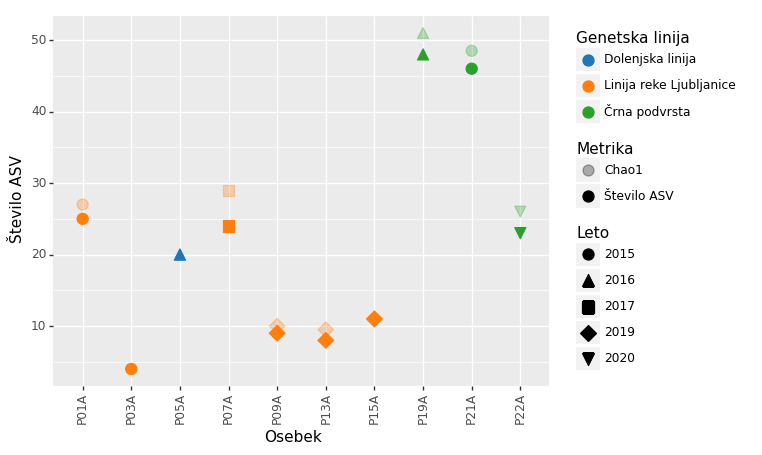

<ggplot: (8768860050116)>

In [23]:
from plotnine import *
from plotnine.data import *

p = (
    ggplot(df, aes(x=df.index, y='Število ASV', shape='Leto', color='Genetska linija', alpha='Metrika'))
    + geom_point(size=4)
    + labs(x='Osebek', y='Število ASV')
    + scale_color_manual(['C0', 'C1', 'C2'])
    + scale_alpha_manual([0.3, 1.0])
    + theme(axis_text_x=element_text(rotation=90))
)

p.save('./results/fungi_obs-feat_chao1.png')

p

In [23]:
ndf = ndf.rename(columns={'population': 'Genetska linija', 'year': 'Leto'})
ndf.index.name = 'Osebek'
ndf

,chao1,simpson,simpson_e,observed_features,dominance,sample,location,origin,Leto,parkelj,specimen,Genetska linija,color
Osebek,,,,,,,,,,,,,
P01A,25.00,0.285022,0.055946,25.0,0.714978,P01A,Planinska_jama,Paa200_t0,2015,no,Paa200,Linija reke Ljubljanice,1
P03A,6.00,0.110563,0.224861,5.0,0.889437,P03A,Planinska_jama,Paa201_t0,2015,no,Paa201,Linija reke Ljubljanice,1
P05A,23.50,0.721367,0.163134,22.0,0.278633,P05A,Stobe,Paa204_t10d,2016,no,Paa204,Dolenjska linija,0
P07A,24.60,0.694250,0.136277,24.0,0.305750,P07A,Planinska_jama,Paa209_t0,2017,no,Paa209,Linija reke Ljubljanice,1
P09A,9.50,0.077047,0.120387,9.0,0.922953,P09A,Planinska_jama,Paa210_t0,2019,no,Paa210,Linija reke Ljubljanice,1
P13A,5.00,0.106882,0.223935,5.0,0.893118,P13A,Planinska_jama,Paa219_t0,2019,no,Paa219,Linija reke Ljubljanice,1
P15A,11.00,0.533689,0.194954,11.0,0.466311,P15A,Planinska_jama,Paa220_t0,2019,no,Paa220,Linija reke Ljubljanice,1
P19A,49.25,0.942108,0.352523,49.0,0.057892,P19A,Obrsec,PB271_parkelj,2016,yes,PB271,Črna podvrsta,2
P21A,50.00,0.953781,0.480798,45.0,0.046219,P21A,Jelsevnik,PB644_parkelj,2015,yes,PB644,Črna podvrsta,2


/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./results/fungi_simpson_e.png


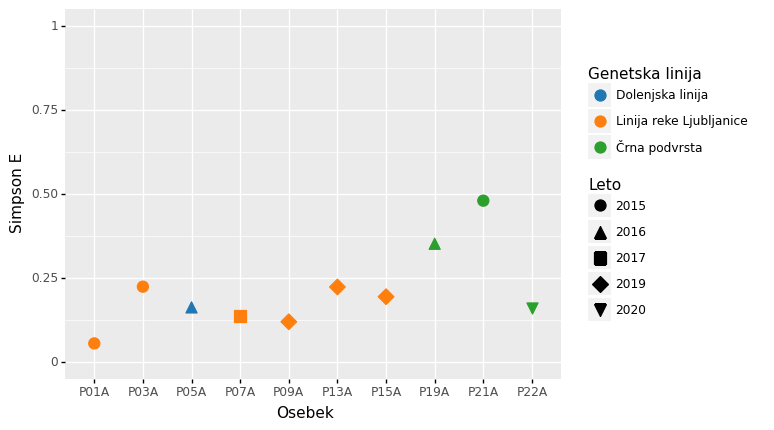

<ggplot: (8781254485703)>

In [24]:
simpson = (
    ggplot(ndf, aes(x=ndf.index, y='simpson_e', shape='Leto', color='Genetska linija'))
    + geom_point(size=4)
    + labs(x='Osebek', y='Simpson E')
    + scale_color_manual(['C0', 'C1', 'C2'])
    + ylim(0,1)
)


simpson.save('./results/fungi_simpson_e.png')
simpson 

In [25]:
# visualisations of alpha diversity metrics
visualizations = {}

for key, value in artifacts.items():
    visualizations[key] = diversity.visualizers.alpha_group_significance(
        alpha_diversity = value,
        metadata = sample_metadata
    ).visualization

In [26]:
# # simpson viz
# visualizations['simpson']

# # observed_features viz
# visualizations['observed_features']

# # fisher_alpha viz
# visualizations['fisher_alpha']

# # chao1 viz
# visualizations['chao1']

# # shannon viz
# visualizations['shannon']

# # evenness_vector viz
# diversity.visualizers.alpha_group_significance(
#     alpha_diversity = action_results.evenness_vector,
#     metadata = sample_metadata
# ).visualization

# # faith_pd viz
# diversity.visualizers.alpha_group_significance(
#     alpha_diversity = action_results.faith_pd_vector,
#     metadata = sample_metadata
# ).visualization

### BETA DIVERSITY

In [27]:
denoisetable_subset_population = q2.plugins.feature_table.methods.filter_samples(
    table = denoisetable_fun,
    metadata = sample_metadata,
    where = "[population] IN ('Linija reke Ljubljanice', 'Črna podvrsta')"
)

In [28]:
# 2016 pade ven
denoisetable_subset_year = q2.plugins.feature_table.methods.filter_samples(
    table = denoisetable_fun,
    metadata = sample_metadata,
    where = "[year] IN ('2015', '2019')"
)

In [29]:
# determine depth/s from alpha_rarefaction
# determine conditions from metadata column names
depth = 8367
condition = 'population'

core_metrics_results_subset_population = diversity.actions.core_metrics_phylogenetic(
    phylogeny = rooted_tree,
    table = denoisetable_subset_population.filtered_table,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-ht9_yeoi/96dbd30f-e403-4497-ab1b-d196783cf30e/data/feature-table.biom -t /tmp/qiime2-archive-55v2vkqs/686496ad-0690-47cf-8fb2-e7f2857851e4/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-afn3v70_

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-ht9_yeoi/96dbd30f-e403-4497-ab1b-d196783cf30e/data/feature-table.biom -t /tmp/qiime2-archive-55v2vkqs/686496ad-0690-47cf-8fb2-e7f2857851e4/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-rvszvs4s

Running external command line application. This may print messages to stdout and/

In [30]:
depth = 8367
condition = 'year'

core_metrics_results_subset_year = diversity.actions.core_metrics_phylogenetic(
    phylogeny = rooted_tree,
    table = denoisetable_subset_year.filtered_table,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-_34561v8/aec24b54-c0e1-46bf-bbdf-fcd145df3495/data/feature-table.biom -t /tmp/qiime2-archive-55v2vkqs/686496ad-0690-47cf-8fb2-e7f2857851e4/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-6lnoczcu

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-_34561v8/aec24b54-c0e1-46bf-bbdf-fcd145df3495/data/feature-table.biom -t /tmp/qiime2-archive-55v2vkqs/686496ad-0690-47cf-8fb2-e7f2857851e4/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-rhe_h640

Running external command line application. This may print messages to stdout and/

#### PERMANOVA

In [31]:
from qiime2.plugins.diversity.visualizers import beta_group_significance

permanova_population = beta_group_significance(
    distance_matrix = core_metrics_results_subset_population.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('population'),
    method = "permanova",
    pairwise = True
)
permanova_population.visualization

<visualization: Visualization uuid: 6e5fd32b-d743-4639-aff7-381847b520d0>

<Figure size 432x288 with 0 Axes>

In [32]:
# PERMANOVA year
from qiime2.plugins.diversity.visualizers import beta_group_significance

permanova_year = beta_group_significance(
    distance_matrix = core_metrics_results_subset_year.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('year'),
    method = "permanova",
    pairwise = True
)
permanova_year.visualization

<visualization: Visualization uuid: 8671b3bd-88fb-4c46-9a7b-dc4192a8dc67>

<Figure size 432x288 with 0 Axes>

#### ANOSIM

In [33]:
anosim_population = beta_group_significance(
    distance_matrix = core_metrics_results_subset_population.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('population'),
    method = "anosim",
    pairwise = True
)
anosim_population.visualization

<visualization: Visualization uuid: e7299470-7ae6-4da7-896d-864ebca9f2c4>

<Figure size 432x288 with 0 Axes>

In [34]:
# anosim year

anosim_year = beta_group_significance(
    distance_matrix = core_metrics_results_subset_year.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('year'),
    method = "anosim",
    pairwise = True
)
anosim_year.visualization

<visualization: Visualization uuid: 9f4eb158-4788-423c-ad1a-816ab9839c71>

<Figure size 432x288 with 0 Axes>